# Investigating Mobile App Store Data

## I. Introduction

In order to gain improved domain knowledge of the mobile app space, the data set of the most frequently rated mobile apps from the appstore in 2017 will be analyzed. We can answer such questions as:


* Which are the most popular apps in terms of total user ratings?
* Which genres have higher average user ratings, the most total ratings?
* Which metrics does the price of an app affect? Are free apps higher rated than paid apps?
* Which variables have the highest correlation with total number of user ratings?

Two metrics that mobile app developers would want to maximize would be: user rating, in a scale from 1-5 we want this be as close to 5 as possible. We would also want to maximize the total number of ratings as the more ratings there are the more credible it is, and the more downloads the app should receive.

Source of data: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

## Getting Started: Loading the data

The data set consists of two csv files one 'AppleStore.csv' contains the metrics of each apps such as average user ratings, prime genre, and price. Whereas 'appleStore_description.csv' contains the description of each app. In this study we will mostly be looking at 'AppleStore.csv' and loading into a variable called `store`.

In [37]:
import os
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.listdir('./data/')

['AppleStore.csv', 'appleStore_description.csv']

In [3]:
store = pd.read_csv('./data/AppleStore.csv')
description = pd.read_csv('./data/appleStore_description.csv')

In [4]:
store=store.drop(['Unnamed: 0','currency'],axis=1,errors='ignore')
print("Data set shape:", store.shape)
display(store.head())

Data set shape: (7197, 15)


,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 15 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 843.5+ KB


In [6]:
store.drop('id',axis=1).describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


Some things that can be gleaned from the above is that there are 7197 apps in the dataset, with 15 features. The average price of the apps are around $1.70 with most of the apps being free. For ratings the average is 300 total ratings. Average user rating is at 3.5. There were also 41 apps with 0 as their `lang.num` value, these could be changed to 1 as all apps should have at least one language supported, however I did see apps in the store listed with no languages so these be left alone since this is how users see the app in the store.

We can infer from the distributions of average user rating, that user ratings do skew more positive or higher with over 75% of apps having average rating greater than or equal to 3.5 and 50% over 4.0. There is also a significant number of apps (13%) with no ratings. There also appears to be relatively low variance in these ratings as such I would claim that total ratings to be a more insightful/important metric for the success of an app.

**Question 1:** Which are the most popular apps in terms of total user ratings?

In [7]:
sorted_by_rating=store[['track_name','prime_genre','user_rating','rating_count_tot']].sort_values(by=['rating_count_tot','user_rating'],ascending=False)
display(sorted_by_rating.head(10))
top10=sorted_by_rating.iloc[:10,:]
print("Percent of total rating counts from the top 10 most popular apps:".upper(),
      int(round(top10.rating_count_tot.sum() / store.rating_count_tot.sum(),2) * 100),"%")

,track_name,prime_genre,user_rating,rating_count_tot
16,Facebook,Social Networking,3.5,2974676
519,Instagram,Photo & Video,4.5,2161558
1346,Clash of Clans,Games,4.5,2130805
707,Temple Run,Games,4.5,1724546
7,Pandora - Music & Radio,Music,4.0,1126879
755,Pinterest,Social Networking,4.5,1061624
4,Bible,Reference,4.5,985920
1493,Candy Crush Saga,Games,4.5,961794
178,Spotify Music,Music,4.5,878563
275,Angry Birds,Games,4.5,824451


PERCENT OF TOTAL RATING COUNTS FROM THE TOP 10 MOST POPULAR APPS: 16 %


The top 10 most popular apps are: **Facebook, Instagram, Clash of Clans, Temple Run, Pandora, Pinterest, Bible, Candy Crush, Spotify, and Angry Birds.**

The genres of the top 10 most rated apps are Social Networking, Photo & Video, Games, Music, Social Networking and Reference. Games appear 4 times in the top 10, social networking and music each appear twice. It would appear that If I wanted to increase the chances of making a popular app, it should be in one of these genres.

Which are the most successful apps? While we do not have a number of downloads column, we do have total ratings which gives us an idea of the popularity of the app since users must have downloaded the app to leave a rating. We sort each app by `rating_count_tot` and then by `user_rating`.

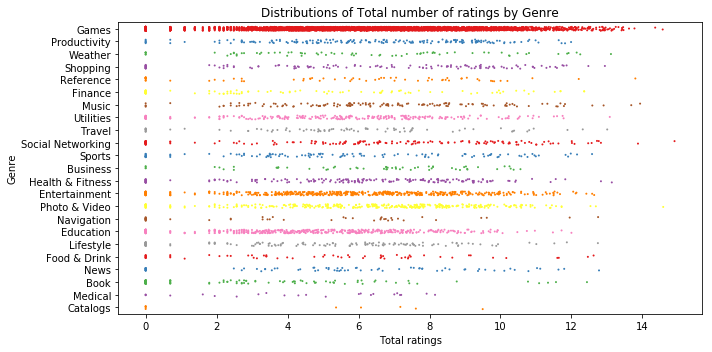

In [8]:
plt.figure(figsize=(10,5))
log_tot_rating = np.log(store.rating_count_tot+1)
sns.stripplot(y='prime_genre', x=log_tot_rating, data=store, orient='h',
             jitter=0.15, palette="Set1", size=2)
plt.xlabel('Total ratings'); plt.ylabel('Genre'); plt.title('Distributions of Total number of ratings by Genre')
plt.tight_layout()
plt.show()

In [9]:
genre_tot_ratings=store[['prime_genre','rating_count_tot']].groupby(by='prime_genre',as_index=False).mean().round(2)\
.rename(columns={'rating_count_tot':'average rating_count_tot'})
top_genres=genre_tot_ratings.sort_values(by='average rating_count_tot',ascending=False).head(10)
top_genres

,prime_genre,average rating_count_tot
18,Social Networking,45498.90
11,Music,28842.02
16,Reference,22410.84
22,Weather,22181.03
17,Shopping,18615.33
14,Photo & Video,14352.28
20,Travel,14129.44
19,Sports,14026.93
6,Food & Drink,13938.62
7,Games,13692.00


F:\Users\cguzm\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


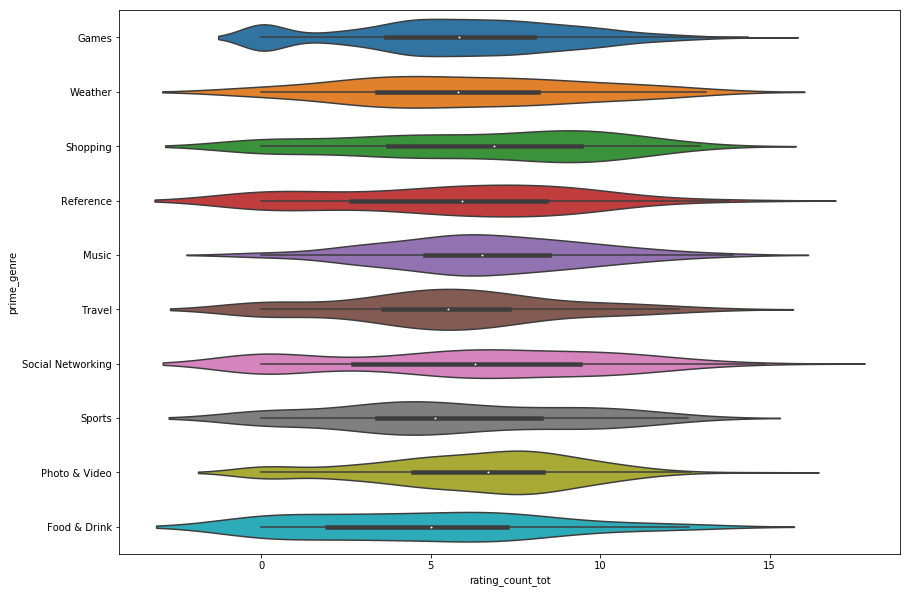

In [10]:
top_genres.prime_genre.values
store_filtered=store[store.prime_genre.isin(top_genres.prime_genre.values)]
store_filtered.rating_count_tot=np.log(store_filtered.rating_count_tot+1)
plt.figure(figsize=(14,10))
sns.violinplot(y='prime_genre',x='rating_count_tot',data=store_filtered)



plt.show()

**Question 2:** Which genres have higher average user ratings?

In [11]:
print("Average Ratings")
averages = []
for g in store.prime_genre.unique():
    avg = round(np.mean(store[store.prime_genre==g].user_rating),2)
    averages.append((g, avg))
avg_ratings_genre=pd.DataFrame(averages, columns=['genre','average rating']).sort_values(by='average rating',ascending=False).reset_index(drop=True)
avg_ratings_genre

Average Ratings


,genre,average rating
0,Productivity,4.01
1,Music,3.98
2,Photo & Video,3.80
3,Business,3.75
4,Health & Fitness,3.70
5,Games,3.69
6,Weather,3.60
7,Shopping,3.54
8,Reference,3.45
9,Travel,3.38


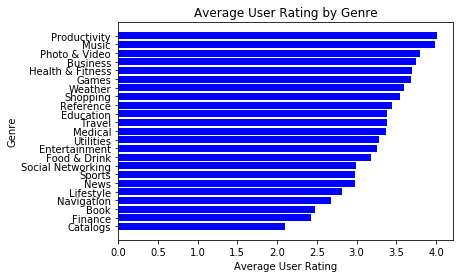

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
avg_ratings_genre=avg_ratings_genre.sort_values(by='average rating',ascending=True).reset_index(drop=True)
plt.barh(y=avg_ratings_genre['genre'],width=avg_ratings_genre['average rating'],
        color='blue')
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.title('Average User Rating by Genre')

plt.show()

As can be seen in the above data frame and bar graph, the apps with the highest average ratings were **Productivity, Music, Photo & Video Apps.** While the genres with the lowest average ratings were **Catalogs, Finance, and Book.**

Average user rating however does not take into account the number of ratings that each app received, to do so a weighted average for each genre will be calculated.

**Creating a new feature: `weighted average user rating`**

In [13]:
display(store[['user_rating', 'rating_count_tot']].head())
display(store[['user_rating_ver', 'rating_count_ver']].head())

def weighted_average(x,n,data):
    w_avg = {}
    for g in store.prime_genre.unique():
        f = data.prime_genre==g # change this to: filter = data.prime_genre == g => data[filter]
        #print("Denominator for:", g, data[f][n].sum())
        if data[f][n].sum() == 0:
            w_avg[g] = 0
        else:
            w_avg[g] = round((data[f][x] * data[f][n]).sum() / data[f][n].sum(), 2)
    return w_avg
w_avg_tot=weighted_average(x='user_rating', n='rating_count_tot', data=store)
w_avg_ver=weighted_average(x='user_rating_ver', n='rating_count_ver', data=store)
w_avg_df=pd.DataFrame({'w_avg_tot':w_avg_tot, 'w_avg_ver':w_avg_ver})
display(w_avg_df)

,user_rating,rating_count_tot
0,4.0,21292
1,4.0,161065
2,3.5,188583
3,4.0,262241
4,4.5,985920


,user_rating_ver,rating_count_ver
0,4.5,26
1,3.5,26
2,4.5,2822
3,4.5,649
4,5.0,5320


,w_avg_tot,w_avg_ver
Book,4.07,4.52
Business,4.35,4.73
Catalogs,4.80,4.90
Education,4.21,3.42
Entertainment,3.83,4.16
Finance,4.13,4.46
Food & Drink,4.47,4.65
Games,4.44,4.49
Health & Fitness,4.25,4.71
Lifestyle,4.17,4.44


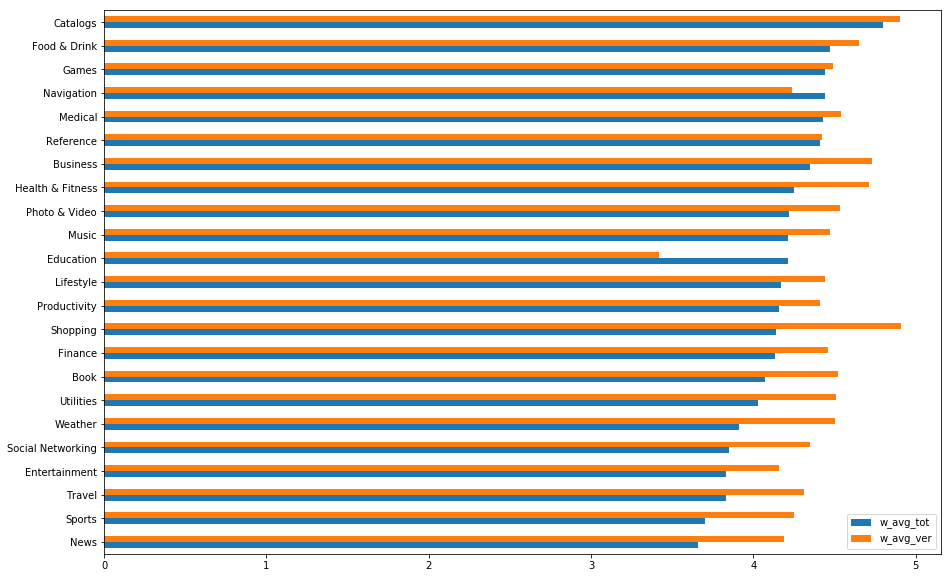

In [14]:
w_avg_df.sort_values(by='w_avg_tot').plot.barh(figsize=(15,10))
plt.show()

Sorting the bar graph by the weighted user rating(taking into account number of user ratings per app) it can be seen that **Catalogs, Food & Drink, and Games** had the highest weighted average user rating.

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
size_bytes,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418
price,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460
user_rating,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094
sup_devices.num,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls.num,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901
lang.num,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000,0.032477
vpp_lic,-0.150418,-0.029942,-0.000982,0.006460,0.069816,0.050094,-0.037109,0.071901,0.032477,1.000000


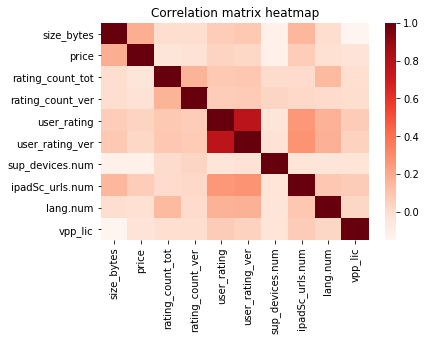

In [15]:
display(store.drop('id',axis=1).corr())
sns.heatmap(data=store.drop('id',axis=1).corr(),cmap='Reds')
plt.title('Correlation matrix heatmap')
plt.show();

**Question 3:** Which metrics does the price of an app affect? Are free apps higher rated than paid apps?

In [16]:
display(store.drop('id',axis=1).corr().loc['price',:])

size_bytes          0.182392
price               1.000000
rating_count_tot   -0.039044
rating_count_ver   -0.018012
user_rating         0.046601
user_rating_ver     0.025173
sup_devices.num    -0.115361
ipadSc_urls.num     0.066100
lang.num           -0.006713
vpp_lic            -0.029942
Name: price, dtype: float64

The feature price has strongest correlation with `price` is: `size_bytes`.

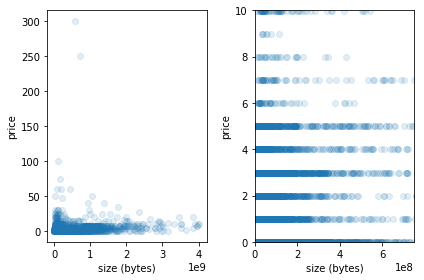

In [17]:
plt.subplots(1,2)

plt.subplot(121)
plt.scatter(x=store['size_bytes'],y=store['price'],alpha=0.125)
plt.xlabel('size (bytes)');plt.ylabel('price')

plt.subplot(122)
plt.scatter(x=store['size_bytes'],y=store['price'],alpha=0.125)
plt.xlabel('size (bytes)')
plt.ylabel('price')
plt.ylim(0,10)
plt.xlim(0,0.75e9)

plt.tight_layout()
plt.show()

In [18]:
paid = store[store.price > 0]
free = store[store.price == 0]
print("Number of paid apps:", len(paid))
print("Number of free apps:", len(free))

print("\nPaid apps:")
display(paid.drop('id',axis=1).describe())
print("Free apps:")
display(free.drop('id',axis=1).describe())

Number of paid apps: 3141
Number of free apps: 4056

Paid apps:


,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,2.652478e+08,3.955298,4038.537090,319.586437,3.720949,3.503661,37.276027,3.864056,5.050621,0.990767
std,4.812326e+08,8.315882,25869.299527,3621.501219,1.311471,1.622219,4.553283,1.900633,7.075142,0.095658
min,5.898240e+05,0.990000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,3.694285e+07,1.990000,31.000000,3.000000,3.500000,3.000000,37.000000,4.000000,1.000000,1.000000
50%,9.229107e+07,2.990000,193.000000,23.000000,4.000000,4.000000,38.000000,5.000000,1.000000,1.000000
75%,2.335140e+08,4.990000,1335.000000,111.000000,4.500000,4.500000,40.000000,5.000000,7.000000,1.000000
max,4.025970e+09,299.990000,698516.000000,177050.000000,5.000000,5.000000,47.000000,5.000000,58.000000,1.000000


Free apps:


,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,4.056000e+03,4056.0,4.056000e+03,4056.000000,4056.000000,4056.000000,4056.000000,4056.000000,4056.000000,4056.000000
mean,1.479357e+08,0.0,1.974980e+04,569.400888,3.376726,3.059911,37.428254,3.585552,5.732495,0.994822
std,2.089014e+08,0.0,9.774428e+04,4134.301293,1.644807,1.919877,2.954281,2.041633,8.505148,0.071777
min,7.671260e+05,0.0,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,5.404134e+07,0.0,2.200000e+01,1.000000,3.000000,1.000000,37.000000,2.000000,1.000000,1.000000
50%,9.960038e+07,0.0,4.660000e+02,22.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.611986e+08,0.0,5.450750e+03,162.250000,4.500000,4.500000,38.000000,5.000000,9.000000,1.000000
max,3.148421e+09,0.0,2.974676e+06,117470.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


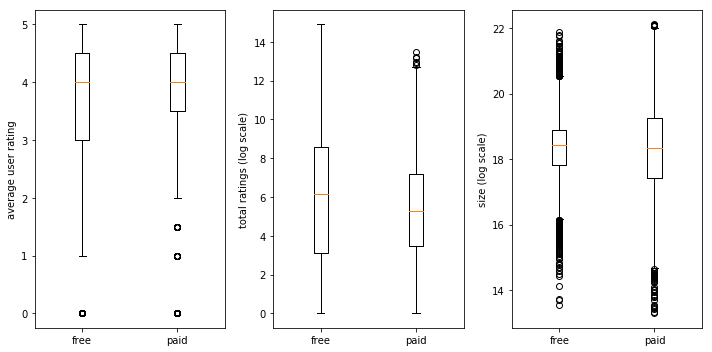

In [19]:
plt.subplots(1,3,figsize=(10,5))
plt.subplot(131)
plt.boxplot([free.user_rating,paid.user_rating],labels=['free','paid'])
plt.ylabel('average user rating')

plt.subplot(132)
plt.boxplot([np.log(free.rating_count_tot + 1),np.log(paid.rating_count_tot + 1)],labels=['free','paid'])
plt.ylabel('total ratings (log scale)')


plt.subplot(133)
plt.boxplot([np.log(free.size_bytes+1),np.log(paid.size_bytes+1)],labels=['free','paid'])
plt.ylabel('size (log scale)')

plt.tight_layout()
plt.show()

* The mean user rating for paid apps was 3.72 which was slightly higher than the mean for free apps which was 3.38, only a 0.34 difference.
* Free apps have more total ratings on average. The mean for total ratings for paid apps was 4038, while it was over 10,000 for free apps. 
* Paid apps are larger in size on average than free apps.

### Which factors lead to more total ratings?

If I wanted to maximize total ratings how would I begin to do so? One obvious insight drawn from the above correlation matrix heat map, was that `rating_count_tot` had a correlation score of 0.14 with `lang.num` (number of languages supported) which makes intuitive sense since the more languages supported, theoretically the more people are able to use the app and thus leave a rating.

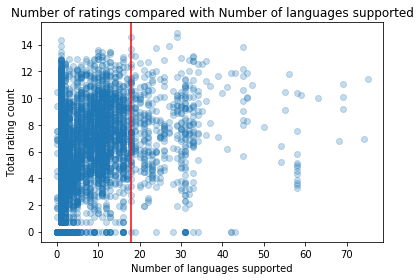

0.14

In [20]:
total_ratings = store['rating_count_tot']
n_lang = store['lang.num']
plt.scatter(n_lang,total_ratings.apply(lambda x: np.log(x + 1)),alpha=0.25)
plt.ylabel('Total rating count')
plt.xlabel('Number of languages supported')
plt.title('Number of ratings compared with Number of languages supported')
plt.axvline(x=18, color='r')
plt.tight_layout()
plt.show()
round(np.corrcoef(total_ratings,n_lang)[0][1],2)

Comparing `lang.num` with `rating_count_tot` it can be seen the majority of the data points lie to the left of 20, this cluster area is bounded by the red line. This area of the graph is very dense and even with an alpha factor it can be difficult to make out the trend in the overlapping points.

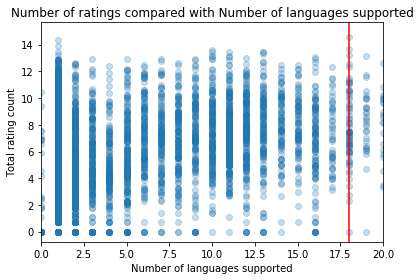

In [21]:
total_ratings = store['rating_count_tot']
n_lang = store['lang.num']
plt.scatter(n_lang,total_ratings.apply(lambda x: np.log(x + 1)),alpha=0.25)
plt.ylabel('Total rating count')
plt.xlabel('Number of languages supported')
plt.title('Number of ratings compared with Number of languages supported')
plt.axvline(x=18, color='r')
plt.xlim(0,20)
plt.tight_layout()
plt.show()

Zooming in we can see the discrete nature of the variable clearly. As the number of languages supported increases, the average of the points seems to increase as well going by how the cluster of points seems to also go up along the y-axis.

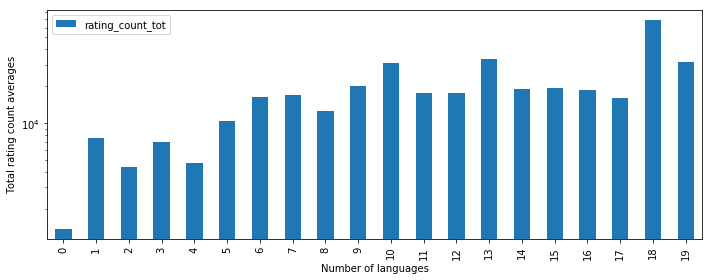

In [22]:
grouped=store[['lang.num','rating_count_tot']].groupby('lang.num')
grouped.agg(np.mean).loc[:19,].plot(kind='bar',logy=True,figsize=(10,4))
plt.ylabel('Total rating count averages');plt.xlabel('Number of languages')
plt.tight_layout()
plt.show()

In [23]:
cm = sns.light_palette("blue", as_cmap=True)
top20=grouped.agg(np.mean).loc[:19,].round(2)
top20.style.background_gradient(cmap=cm)

,rating_count_tot
lang.num,
0,1384
1,7507
2,4434.64
3,7014.33
4,4712.51
5,10378.7
6,16177.6
7,16797.5
8,12612.5


In [24]:
len(store[store['lang.num'] == 0])

41

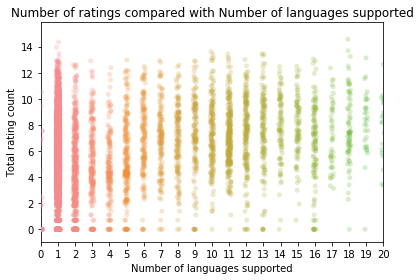

In [25]:
total_ratings = store['rating_count_tot']
n_lang = store['lang.num']
sns.stripplot(n_lang,total_ratings.apply(lambda x: np.log(x + 1)),
              alpha=0.25,jitter=True)
plt.ylabel('Total rating count')
plt.xlabel('Number of languages supported')
plt.title('Number of ratings compared with Number of languages supported')
plt.xlim(0,20)
plt.tight_layout()
plt.show()

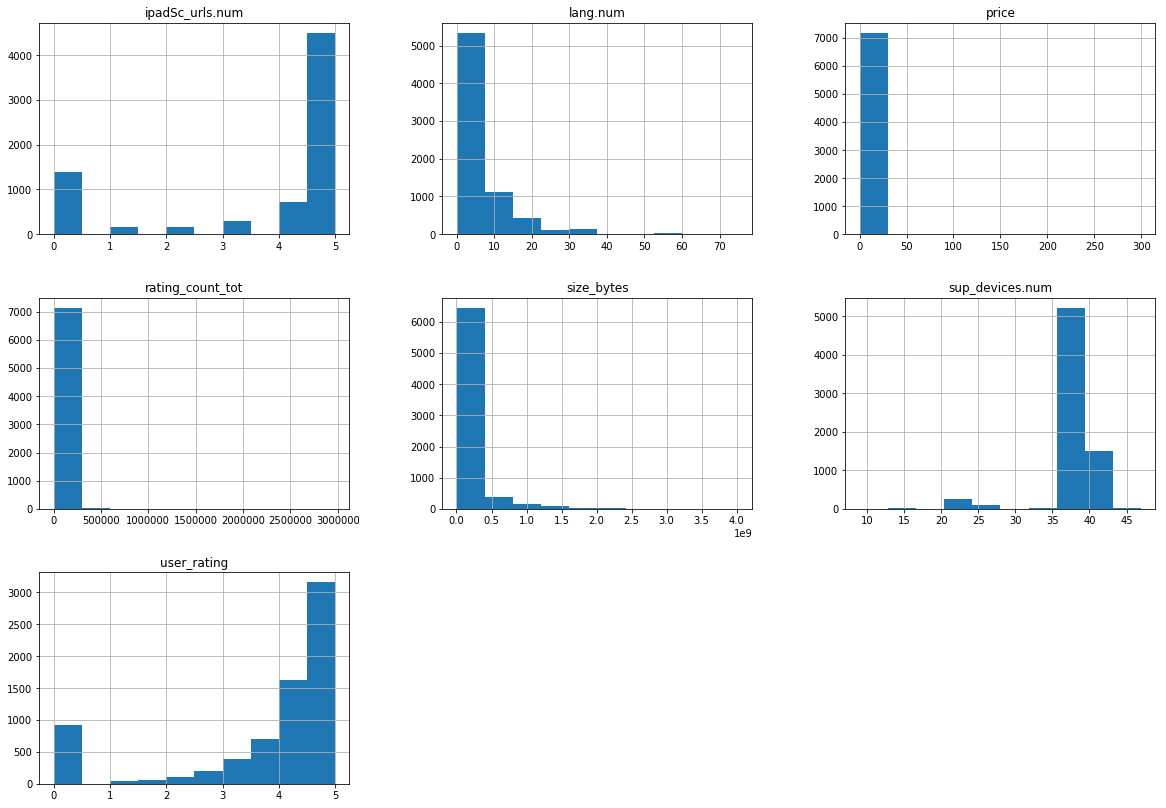

In [26]:
target = ['rating_count_tot']
numeric = ['size_bytes','price','user_rating',
           'sup_devices.num','ipadSc_urls.num','lang.num']
non_numeric = ['cont_rating','prime_genre','vpp_lic']
features = numeric + non_numeric

# Detect skewed data
store[target + numeric].hist(figsize=(20,14),xlabelsize=10);

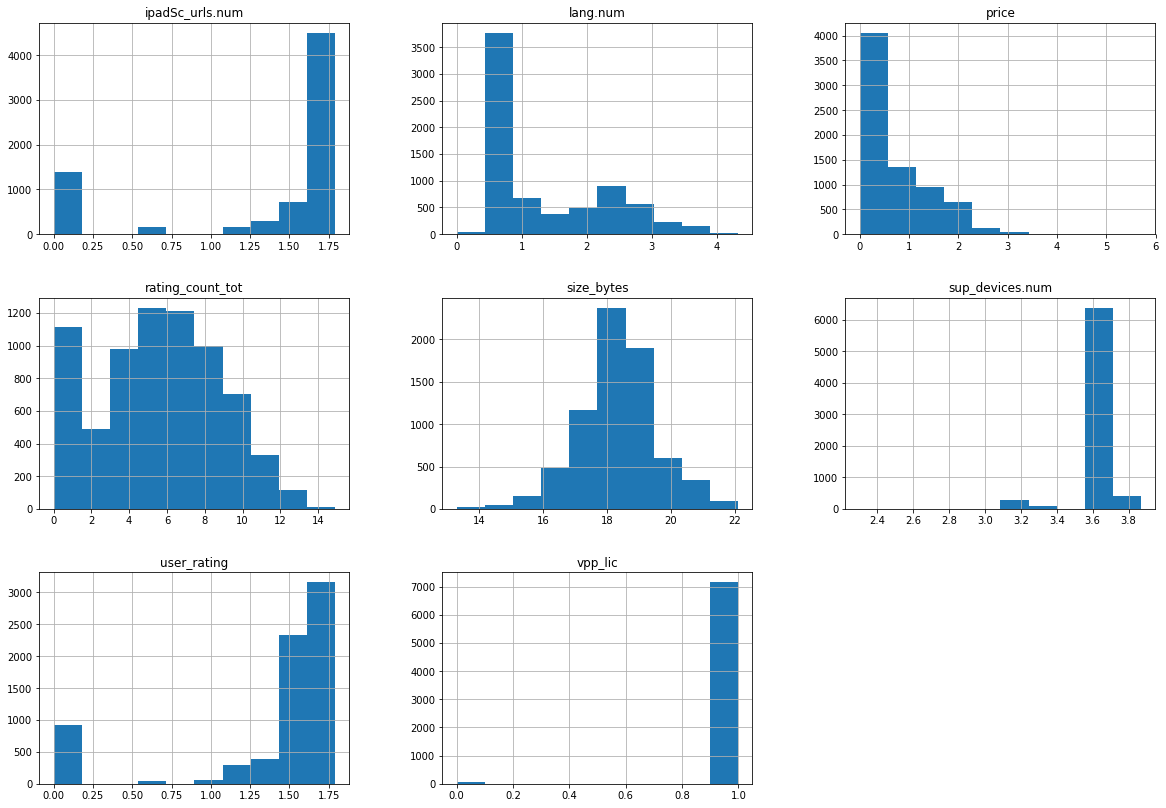

In [27]:
log_store = store.loc[:, target + features]
log_store[target + numeric] = np.log(store[target + numeric] + 1)

log_store.hist(figsize=(20,14),xlabelsize=10);

plt.show()

### Data preprocessing

In [28]:
list(pd.get_dummies(log_store[non_numeric]).columns)

['vpp_lic',
 'cont_rating_12+',
 'cont_rating_17+',
 'cont_rating_4+',
 'cont_rating_9+',
 'prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather']

In [29]:
#from sklearn.preprocessing import MinMaxScaler

target = ['rating_count_tot']
numeric = ['size_bytes','price','user_rating',
           'sup_devices.num','ipadSc_urls.num','lang.num']
non_numeric = ['cont_rating','prime_genre','vpp_lic']

df = log_store.loc[:,target + numeric + non_numeric]

# Outlier detection
if True:
    for feat in target + numeric:
        q75, q25 = np.percentile(df[feat],[75,25])
        iqr = q75 - q25

        lower = q25 - (iqr*1.5)
        upper = q75 + (iqr*1.5)
        outliers = list(filter(lambda x: (x < q25) or (x > q75),df[feat]))
        print(feat.upper(), "outliers:\n", len(outliers))

#scaler = MinMaxScaler()

#df[target + numeric] = scaler.fit_transform(df[target + numeric])
df[target + numeric] = (log_store[target + numeric] - np.mean(log_store[target + numeric]) / np.std(log_store[target + numeric]))


df.head()

RATING_COUNT_TOT outliers:
 3596
SIZE_BYTES outliers:
 3598
PRICE outliers:
 1792
USER_RATING outliers:
 2206
SUP_DEVICES.NUM outliers:
 2022
IPADSC_URLS.NUM outliers:
 1698
LANG.NUM outliers:
 1756


,rating_count_tot,size_bytes,price,user_rating,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,vpp_lic
0,8.291216,3.459933,0.836658,-0.880773,-27.168956,-0.170371,0.864637,4+,Games,1
1,10.314652,3.913163,-0.770778,-0.880773,-27.194931,-0.170371,1.644796,4+,Productivity,1
2,10.472381,3.457309,-0.770778,-0.986134,-27.194931,-0.170371,-0.146964,4+,Weather,1
3,10.802105,3.702934,-0.770778,-0.880773,-27.194931,-0.170371,0.769327,12+,Shopping,1
4,12.126414,3.377082,-0.770778,-0.785463,-27.194931,-0.170371,2.295383,4+,Reference,1


In [30]:
df = pd.get_dummies(df, columns=non_numeric)
df.describe()

,rating_count_tot,size_bytes,price,user_rating,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating_12+,cont_rating_17+,cont_rating_4+,...,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,vpp_lic_0,vpp_lic_1
count,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,...,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,3.867867,3.378653,-0.171560,-1.091176,-27.191531,-0.588462,-0.155102,0.160484,0.086425,0.615951,...,0.024733,0.008893,0.016952,0.023204,0.015840,0.011255,0.034459,0.010004,0.006947,0.993053
std,3.309518,1.225801,0.777474,0.561853,0.118097,0.700139,0.898904,0.367079,0.281010,0.486403,...,0.155320,0.093887,0.129099,0.150562,0.124865,0.105497,0.182417,0.099526,0.083066,0.083066
min,-1.674918,-1.681018,-0.770778,-2.490211,-28.529932,-1.962130,-1.533258,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.692378,2.695414,-0.770778,-0.986134,-27.194931,-0.575836,-0.840111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.032192,3.423199,-0.770778,-0.880773,-27.194931,-0.170371,-0.840111,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.260312,4.050505,0.324496,-0.785463,-27.168956,-0.170371,0.663967,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,13.230728,7.147433,4.936299,-0.698451,-26.961316,-0.170371,2.797475,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
from sklearn.model_selection import train_test_split

X, y = df.drop(target,axis=1), df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5757 samples.
Testing set has 1440 samples.


## Initial Model Evaluation

To properly evaluate the performance of each model chosen, it's important that to create a training and predicting pipeline that allows to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.

In [48]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    
    results = {}
    
    # Fit learner to the training data
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # calculate the training time
    results['train_time'] = end - start
    
    # Get the predictions on the test set
    # then get predictions on the first 300 training samples
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
    
    # Compute R^2 on the first 300 training samples
    print("Learner:", learner.__class__.__name__, 
          y_train[:300].shape,predictions_train.shape)
    results['score_train'] = learner.score(predictions_train, y_train[:300])
    
    # Compute R^2 on test set
    results['score_test'] = learner.score(predictions_test, y_test)
    
    # success
    print("{} trained on {} samples.".format(learner.__class__.__name__,
                                            sample_size))
    # return the results
    return results

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

lr = LinearRegression()
ls = Lasso
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
sv = SVR()
regressors = [lr,ls,dt,rf,sv]
# Calculate the number of samples for 1% 10% 100% of the training data
samples_100 = len(y_train) # 100% (the entire data set)
samples_10 = int(len(y_train) * 0.10)
samples_1 = int(len(y_train) * 0.01)
print(samples_1,samples_10,samples_100)

# Collect results on the learners
results = {}
for reg in regressors:
    reg_name = reg.__class__.__name__
    results[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[reg_name][i] = \
        train_predict(reg, samples, X_train, y_train, X_test, y_test)

57 575 5757
Learner: LinearRegression (300, 1) (300, 1)


ValueError: shapes (300,1) and (35,1) not aligned: 1 (dim 1) != 35 (dim 0)

In [58]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr.score(pred, y_test)

ValueError: shapes (1440,1) and (35,1) not aligned: 1 (dim 1) != 35 (dim 0)

In [59]:
pred.shape

(1440, 1)

In [60]:
y_test.shape

(1440, 1)